#Image Segmantation

## Installation and Reading Data


In [ ]:
%%capture
# Importing data
! wget www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
! tar -xvf /content/BSR_bsds500.tgz
! rm /content/BSR_bsds500.tgz

# Importing libraries
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sb
import cv2
import math
from sklearn.cluster import KMeans

In [ ]:
# Function to get the data and label given the paths
def get_data_and_labels(IMAGES_PATH,GROUNDTRUTH_PATH):
  images_dir = ! ls {IMAGES_PATH}
  images = list()
  for line in images_dir :
    for image in line.split():
      images.append(image)
  images.remove('Thumbs.db')
  D = list()
  for image in images:
    D.append(plt.imread(IMAGES_PATH+image))
  D = np.array(D,dtype = np.ndarray)
  labels = [img[:-3]+'mat' for img in images]
  Y = list()
  for label in labels:
    groundTruth = list()
    mat = scipy.io.loadmat(GROUNDTRUTH_PATH + label)
    groundTruth_count = mat['groundTruth'].shape[1]
    for i in range(groundTruth_count):
      groundTruth.append((np.array(mat['groundTruth'][0][i][0][0][0]),np.array(mat['groundTruth'][0][i][0][0][1])))
    Y.append(groundTruth)
  return D,Y

In [ ]:
TRAINING_IMAGES_PATH = '/content/BSR/BSDS500/data/images/train/'
TRAINING_GROUNDTRUTH_PATH = '/content/BSR/BSDS500/data/groundTruth/train/'
VALIDATION_IMAGES_PATH = '/content/BSR/BSDS500/data/images/val/'
VALIDATION_GROUNDTRUTH_PATH = '/content/BSR/BSDS500/data/groundTruth/val/'
TESTING_IMAGES_PATH = '/content/BSR/BSDS500/data/images/test/'
TESTING_GROUNDTRUTH_PATH = '/content/BSR/BSDS500/data/groundTruth/test/'

D_train,Y_train = get_data_and_labels(TRAINING_IMAGES_PATH,TRAINING_GROUNDTRUTH_PATH)
D_validation,Y_validation = get_data_and_labels(VALIDATION_IMAGES_PATH,VALIDATION_GROUNDTRUTH_PATH)
D_testing,Y_testing = get_data_and_labels(TESTING_IMAGES_PATH,TESTING_GROUNDTRUTH_PATH)

In [ ]:
def visualize_data(D,Y,index):
  plt.imshow(D[index]);
  plt.axis('off');
  plt.show()
  groundTruth_count = len(Y[index])
  plt.figure(figsize=(20,5))
  for i in range(groundTruth_count):
    plt.subplot(2,groundTruth_count,i+1)
    plt.imshow(Y[index][i][0]);
    plt.axis('off');
    plt.subplot(2,groundTruth_count,i+1+groundTruth_count)
    plt.imshow(Y[index][i][1]);
    plt.axis('off');
  plt.subplots_adjust(wspace=0.01, hspace=0)
  plt.show()

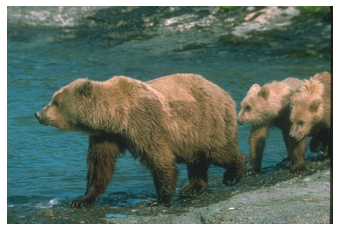

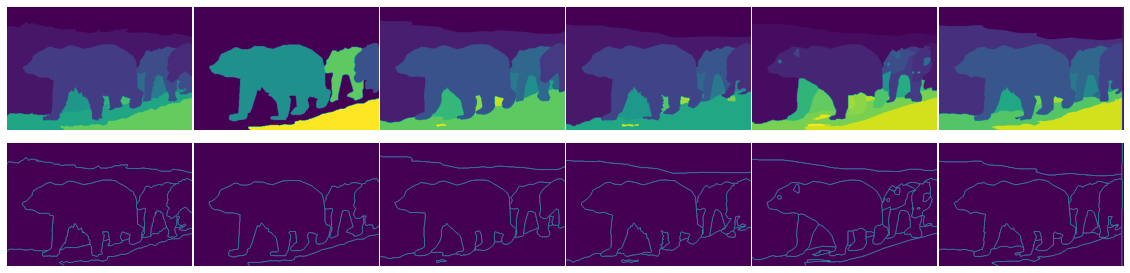

In [ ]:
visualize_data(D_train,Y_train,0)

## K-Means


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
def distance(x,y):
    len_x = len(x)
    len_y = len(y)
    if len_x == len_y:
        under_root= 0
        for i in range(len_x):
            under_root += ( x[i] - y[i] ) ** 2
        return np.sqrt(under_root)
    if len_x < len_y:
        temp = x
        x=y
        y=temp
        len_x = len(x)
        len_y = len(y)
    under_root = 0
    for i in range(len_y):
        under_root += (x[i] - y[i]) ** 2
    for i in range(len_y,len_x):
        under_root += (x[i]) ** 2
    return np.sqrt(under_root)

In [ ]:
def arrange_centroids_cluster(centroids, cluster, k):
    dict = {}
    cl = cluster.copy()
    ce = centroids.copy()
    i=0
    j=0
    while i < k:
        if cluster[i] in dict:
            k+=1
        else:
            dict[cluster[i]] = float(j)
            j+=1
        i+=1
    for i in range(len(cluster)):
        cl[i] = dict[cluster[i]]
    i = 0
    for key in dict:
        ce[i] = centroids[int(key)]
        i+=1
    return ce, cl

In [ ]:
def arrange_cluster(cluster, k):
    dict = {}
    c = cluster.copy()
    i=0
    j=0
    while i < k:
        if cluster[i] in dict:
            k+=1
        else:
            dict[cluster[i]] = float(j)
            j+=1
        i+=1
    for i in range(len(cluster)):
        c[i] = dict[cluster[i]]
    return c

In [ ]:
def kmeans(X, k):
  if k>X.shape[0]:
      k=X.shape[0]
  changing = 1
  cluster = np.zeros(X.shape[0])
  centroids = pd.DataFrame(X).sample(n=k).values
  print(centroids)
  while changing:
     for i, point in enumerate(X):
         min_distance = math.inf
         for idx, centroid in enumerate(centroids):
             d = distance(centroid,point)
             if min_distance > d:
                min_distance = d
                cluster[i] = idx
     new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
     if np.count_nonzero(centroids-new_centroids) == 0:
        changing = 0
     else:
        centroids = new_centroids
  centroids, cluster = arrange_centroids_cluster(centroids, cluster, k)
  return centroids, cluster

In [ ]:
def show_clusters(centroids, cluster):
    sns.scatterplot(X[:, 0], X[:, 1], hue=cluster)
    sns.scatterplot(centroids[:, 0], centroids[:, 1], s=100, color='y')
    plt.show()

[[ 32  55  47]
 [ 56 116 127]
 [134 146 136]
 [120  96  62]
 [193 164 150]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys


[0. 0. 0. ... 4. 4. 4.]
[[127.99201861 122.80434291  97.81035318]
 [ 58.72154398 112.93734575 118.36644839]
 [182.15738054 160.86843508 139.44401682]
 [ 64.8658737   88.66734429  75.08278547]
 [ 40.23032469  55.00978755  44.12897515]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


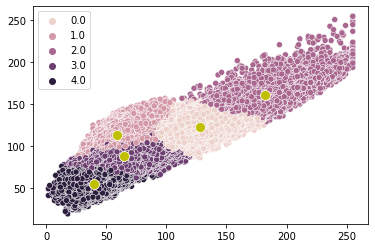

In [ ]:
#for testing (sheet example)
# X = np.array([[2, 10, 0], [4, 9, 0], [5, 8, 0], [2, 5, 0], [8, 4, 0], [7, 5, 0], [6, 4, 0], [1, 2, 0]])
X = np.reshape(D_train[0], (D_train[0].shape[0]*D_train[0].shape[1],3))
k = 5
centroids, cluster = kmeans(X, k)
print(cluster)
print(centroids)
show_clusters(centroids, cluster)

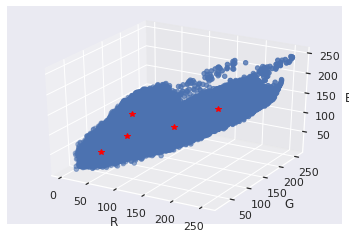

In [ ]:
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")

ax.scatter(xs = X[:, 0], ys = X[:, 1], zs = X[:, 2])
ax.plot(xs = centroids[:, 0], ys = centroids[:, 1], zs = centroids[:, 2], color='RED', marker='*', ls='none')

plt.show()

In [ ]:
cluster

array([0., 0., 0., ..., 4., 4., 4.])

In [ ]:
result = np.reshape(cluster, (D_train[0].shape[0],D_train[0].shape[1]))

In [ ]:
np.reshape(Y_train[0][1][0], (D_train[0].shape[0]*D_train[0].shape[1]))

array([1, 1, 1, ..., 5, 5, 5], dtype=uint16)

In [ ]:
print(np.unique(result))

[0. 1. 2. 3. 4.]


In [ ]:
print(len(np.unique(Y_train[0][1][0])))

5


In [ ]:
print(np.unique(Y_train[0][1][1]))

[0 1]


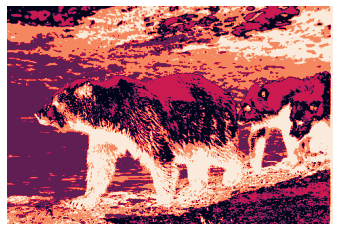

In [ ]:
plt.imshow(result);
plt.axis('off');
plt.show()

[[165 168 149]
 [ 58  82  66]
 [196 155 127]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys


[0. 0. 0. ... 2. 2. 2.]
[[ 71.28206322 105.74555981  99.17820414]
 [158.46069742 144.16938623 120.8433695 ]
 [ 48.26400324  64.82807727  52.12679276]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


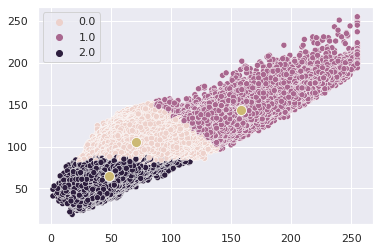

In [ ]:
#for testing (sheet example)
# X = np.array([[2, 10, 0], [4, 9, 0], [5, 8, 0], [2, 5, 0], [8, 4, 0], [7, 5, 0], [6, 4, 0], [1, 2, 0]])
X = np.reshape(D_train[0], (D_train[0].shape[0]*D_train[0].shape[1],3))
k = 3
centroids, cluster = kmeans(X, k)
print(cluster)
print(centroids)
show_clusters(centroids, cluster)

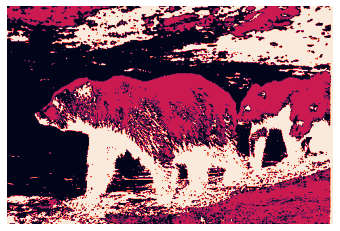

In [ ]:
results = np.reshape(cluster, (D_train[0].shape[0],D_train[0].shape[1]))
plt.imshow(results);
plt.axis('off');
plt.show()

In [ ]:
i=200
print(result[0][i])
print(Y_train[0][1][1][0][i])

4.0
0


In [ ]:
cluster.shape

(154401,)

In [ ]:
c = X.copy()
print(c.shape)

(154401, 3)


In [ ]:
print((centroids[0]).shape)

(3,)


In [ ]:
len(np.unique(centroids))

9

In [ ]:
c = X.copy()
print(len(np.unique(c)))
for i in range(len(c)):
  c[i] = centroids[int(cluster[i])]
print(len(np.unique(c)))
# print(c)

253
9


(321, 481, 3)


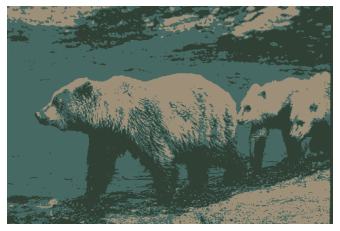

In [ ]:
c1 = np.reshape(c, (D_train[0].shape[0],D_train[0].shape[1],3))
print(c1.shape)
plt.imshow(c1);
plt.axis('off');
plt.show()

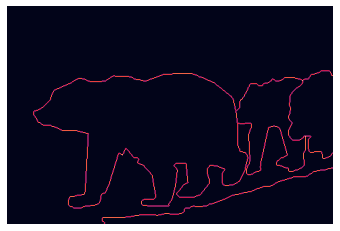

In [ ]:
plt.imshow(Y_train[0][1][1]);
plt.axis('off');
plt.show()

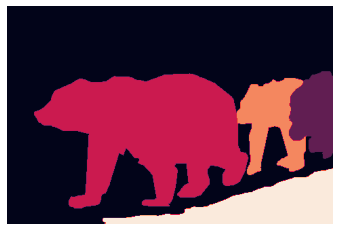

In [ ]:
plt.imshow(Y_train[0][1][0]);
plt.axis('off');
plt.show()

(154401,)
(321, 481)


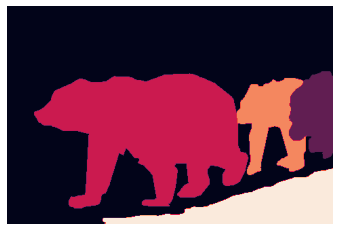

In [ ]:
new1 = arrange_cluster(np.reshape(Y_train[0][1][0], (D_train[0].shape[0]*D_train[0].shape[1])),len(np.unique(Y_train[0][1][0])))
print(new1.shape)
new2 = np.reshape(new1, (D_train[0].shape[0],D_train[0].shape[1]))
print(new2.shape)
plt.imshow(new2);
plt.axis('off');
plt.show()

(154401, 5)
[[ 53 119 131 260 109]
 [153 133  98 123 468]
 [ 62  83  68 272 323]
 [ 26  41  34 208 377]
 [195 156 123 151 376]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


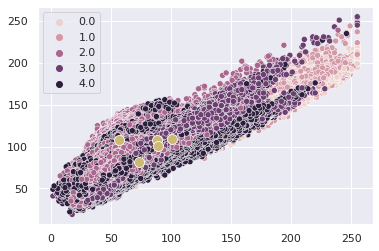

In [ ]:
with_position=list()
for i in range(D_train[0].shape[0]):
  for j in range(D_train[0].shape[1]):
    with_position.append([D_train[0][i][j][0], D_train[0][i][j][1], D_train[0][i][j][2],i,j])
with_position = np.array(with_position)
print(with_position.shape)
k = 5
centroids, cluster = kmeans(with_position, k)
# print(cluster)
# print(centroids)
show_clusters(centroids, cluster)

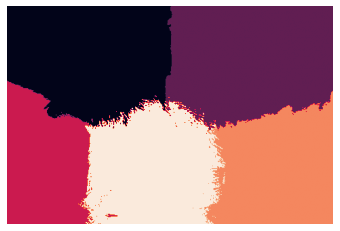

In [ ]:
result = np.reshape(cluster, (D_train[0].shape[0],D_train[0].shape[1]))
plt.imshow(result);
plt.axis('off');
plt.show()

In [ ]:
import math
with_position=list()
for i in range(D_train[0].shape[0]):
  for j in range(D_train[0].shape[1]):
    with_position.append([D_train[0][i][j][0], D_train[0][i][j][1], D_train[0][i][j][2],math.sqrt(i**2+j**2)])
with_position = np.array(with_position)
print(with_position.shape)

(154401, 4)


(154401, 4)
[[115.         104.          72.         190.07893097]
 [158.         163.         141.         521.72214827]
 [ 26.          57.          59.         322.59107241]
 [ 57.          78.          61.         455.82123689]
 [126.         106.          73.         340.14702703]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


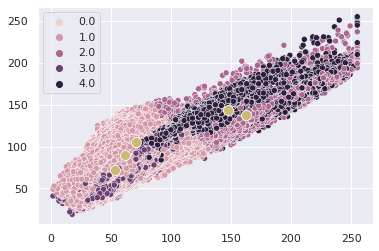

In [ ]:
print(with_position.shape)
k = 5
centroids, cluster = kmeans(with_position, k)
# print(cluster)
# print(centroids)
show_clusters(centroids, cluster)

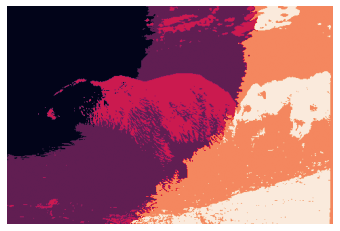

In [ ]:
result = np.reshape(cluster, (D_train[0].shape[0],D_train[0].shape[1]))
plt.imshow(result);
plt.axis('off');
plt.show()

In [ ]:
with_position=list()
minR = math.inf
minB = math.inf
minG = math.inf
maxR = -math.inf
maxB = -math.inf
maxG = -math.inf
for i in range(D_train[0].shape[0]):
  for j in range(D_train[0].shape[1]):
    if minR>D_train[0][i][j][0]:
      minR=D_train[0][i][j][0]
    if minB>D_train[0][i][j][1]:
      minB=D_train[0][i][j][1]
    if minG>D_train[0][i][j][2]:
      minG=D_train[0][i][j][2]
    if maxR<D_train[0][i][j][0]:
      maxR=D_train[0][i][j][0]
    if maxB<D_train[0][i][j][1]:
      maxB=D_train[0][i][j][1]
    if maxG<D_train[0][i][j][2]:
      maxG=D_train[0][i][j][2]
    with_position.append([D_train[0][i][j][0], D_train[0][i][j][1], D_train[0][i][j][2]])
with_position = np.array(with_position)
array1 = (with_position-np.array([minR,minB,minG]))
array2 = (np.array([maxR,maxB,maxG]) - np.array([minR,minB,minG]))
with_position = np.divide(array1, array2)
print(with_position.shape)

(154401, 3)


[[0.22924901 0.38983051 0.43829787]
 [0.36758893 0.44915254 0.44680851]
 [0.20158103 0.34745763 0.38723404]
 [0.19367589 0.41525424 0.51489362]
 [0.63241107 0.45338983 0.33191489]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


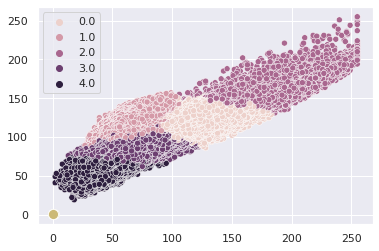

In [ ]:
k = 5
centroids, cluster = kmeans(with_position, k)
# print(cluster)
# print(centroids)
show_clusters(centroids, cluster)

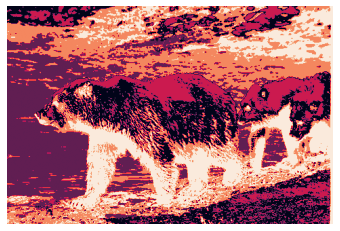

In [ ]:
result = np.reshape(cluster, (D_train[0].shape[0],D_train[0].shape[1]))
plt.imshow(result);
plt.axis('off');
plt.show()

In [ ]:
with_position=list()
minR = math.inf
minB = math.inf
minG = math.inf
minI = math.inf
minJ = math.inf
maxR = -math.inf
maxB = -math.inf
maxG = -math.inf
maxI = -math.inf
maxJ = -math.inf
for i in range(D_train[0].shape[0]):
  for j in range(D_train[0].shape[1]):
    if minR>D_train[0][i][j][0]:
      minR=D_train[0][i][j][0]
    if minB>D_train[0][i][j][1]:
      minB=D_train[0][i][j][1]
    if minG>D_train[0][i][j][2]:
      minG=D_train[0][i][j][2]
    if minI>i:
      minI=i
    if minJ>j:
      minJ=j
    if maxR<D_train[0][i][j][0]:
      maxR=D_train[0][i][j][0]
    if maxB<D_train[0][i][j][1]:
      maxB=D_train[0][i][j][1]
    if maxG<D_train[0][i][j][2]:
      maxG=D_train[0][i][j][2]
    if maxI<i:
      maxI=i
    if maxJ<j:
      maxJ=j
    with_position.append([D_train[0][i][j][0], D_train[0][i][j][1], D_train[0][i][j][2],i,j])
with_position = np.array(with_position)
array1 = (with_position-np.array([minR,minB,minG,minI,minI]))
array2 = (np.array([maxR,maxB,maxG,maxI,maxI]) - np.array([minR,minB,minG,minI,minI]))
with_position = np.divide(array1, array2)
print(with_position.shape)

(154401, 5)


In [ ]:
k = 5
centroids, cluster = kmeans(with_position, k)
# print(cluster)
# print(centroids)
show_clusters(centroids, cluster)

In [ ]:
result = np.reshape(cluster, (D_train[0].shape[0],D_train[0].shape[1]))
plt.imshow(result);
plt.axis('off');
plt.show()

trying buikt in

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(5)
k_means.fit(with_position)
identified_clusters = k_means.fit_predict(with_position)
# identified_centroids = k_means.cluster_centers_
# identified_centroids, identified_clusters = arrange_centroids_cluster(identified_centroids, identified_clusters, 5)

result = np.reshape(identified_clusters, (D_train[0].shape[0],D_train[0].shape[1]))
plt.imshow(result);
plt.axis('off');
plt.show()

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(5)
k_means.fit(X)
identified_clusters = k_means.fit_predict(X)

identified_centroids = k_means.cluster_centers_
identified_centroids, identified_clusters = arrange_centroids_cluster(identified_centroids, identified_clusters, 5)

result = np.reshape(identified_clusters, (D_train[0].shape[0],D_train[0].shape[1]))
plt.imshow(result);
plt.axis('off');
plt.show()

## Normalized cut (Spectral Clustering)

In [ ]:
# Function to get the distance between two pixels
def get_distance(pixel1,pixel2):
  return np.sqrt(np.power((pixel1[0]-pixel2[0]),2)+np.power((pixel1[1]-pixel2[1]),2)+np.power((pixel1[2]-pixel2[2]),2))

# This function do the spectral clustering using 5-NN and K=5
def spectral_clustering(image,resize_dim):

  # Resizing image 
  print('Original image:')
  plt.imshow(image);
  plt.axis('off');
  plt.show()
  image = cv2.resize(image, (resize_dim[1],resize_dim[0]))
  print('Image after resizing:')
  plt.imshow(image);
  plt.axis('off');
  plt.show()

  # Creating the weight matrix
  n = resize_dim[0]*resize_dim[1]
  W = np.zeros((n,n))
  image = image.reshape((-1,3))
  image = image.astype('float64')
  for i in range(n):
    distances = np.zeros(n)
    indeces = np.zeros(n)
    curr = 0
    for j in range(n):
      if(i==j):
        continue
      distances[curr] = get_distance(image[i],image[j])
      indeces[curr] = j
      curr+=1
    idx = distances.argsort()
    indeces = indeces[idx][:5]
    for index in indeces:
      W[i,int(index)] = 1
  for i in range(n):
    W[i,i]=1

  # Creating the delta matrix and the Laplacian matrix
  delta = np.zeros(n)
  for i in range(n):
    degree = 0
    for j in range(n):
      degree += W[i][j]
    delta[i] = degree
  delta = np.diag(delta)
  L = delta - W
  La = np.dot(np.linalg.inv(delta),L)

  # Getting eigen values and eigen vectors
  eigen_values,eigen_vectors = np.linalg.eig(La)
  eigen_values = np.real(eigen_values)
  eigen_vectors = np.real(eigen_vectors)
  idx = eigen_values.argsort()
  eigen_values = eigen_values[idx]
  eigen_vectors = eigen_vectors[:,idx]

  # Creating the U and Y matrix
  U = eigen_vectors[:,:5]
  Y = np.zeros(U.shape)
  norms = np.linalg.norm(U,axis = 1,ord=2)
  for row in range(n):
    Y[row] = U[row] / norms[row]
  
  # Running K-means
  kmeans = KMeans(5)
  kmeans.fit(Y)
  identified_clusters = kmeans.fit_predict(Y)
  clustered_image = identified_clusters.reshape(resize_dim)
  print('Clustered image:')
  plt.imshow(clustered_image);
  plt.axis('off');
  plt.show()
  return clustered_image

In [ ]:
new_image = spectral_clustering(D_train[60],(40,60))

In [ ]:
plt.imshow(new_image);

## F-measure

In [ ]:
from IPython.core.display import Math
from sklearn import metrics
import numpy as np
import math
#for testing (lecture example)
y_act= [1,1,1,1,1,2,2,2,2,2,1,3,3,3,3,3,1,1]
y_pred=[1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3,3]
def F_measure(y_pred,y_act):
  conf=np.array(metrics.confusion_matrix(y_act, y_pred))
  F_score=0
  for i in range(len(conf[0])):
    prec=conf[i,i]/np.sum(conf[:,i])
    if(math.isnan(prec)):prec=0
    recall=conf[i,i]/np.sum(conf[i,:])
    if(math.isnan(recall)):recall=0
    if(not (prec==0 and recall==0)):
      F_score=F_score+((2*prec*recall)/(prec+recall))
  return(F_score/len(conf[0]))

## Conditional Entropy

In [ ]:
def conditional_entropy(y_pred,y_act):
  conf=np.array(metrics.confusion_matrix(y_act, y_pred))
  entropy_score=0
  for i in range(len(conf[0])):
    current_entropy=0
    for j in range(len(conf[0])):
      ent=conf[j,i]/np.sum(conf[:,i])
      if(not(math.isnan(ent)|(ent==0))):
        current_entropy=current_entropy-(ent*math.log2(ent))
    entropy_score+=current_entropy*(1/len(y_pred))
  return entropy_score

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)
# print(new1[0])
# print(cluster[0])
print(F_measure(cluster,new1))
print(conditional_entropy(cluster,new1))

In [ ]:
new1 = arrange_cluster(np.reshape(Y_train[0][1][0], (D_train[0].shape[0]*D_train[0].shape[1])),len(np.unique(Y_train[0][1][0])))
new2 = arrange_cluster(np.reshape(Y_train[0][2][0], (D_train[0].shape[0]*D_train[0].shape[1])),len(np.unique(Y_train[0][2][0])))
print(F_measure(new2,new1))
print(conditional_entropy(new2,new1))